## Neural Networks: An Introduction

OpenAI's ChatGPT and Google's Gemini?!

The cornerstone of these innovations: *Artificial Neural Networks*

In this tutorial:

1. Building Blocks

2. Network Architecture

3. Example of a forward pass with XOR Example (understanding the mathematics behind it!)

#### *A Neural Network?*

A network inspired by the brain, learning and adapting like we do. They have "neurons" connected like brain cells, processing information in layers.

\

![NN eq to brain cell](https://miro.medium.com/v2/resize:fit:720/format:webp/1*BMSfafFNEpqGFCNU4smPkg.png)

\

**Key Characteristics**

1. Information processing occurs over simple elements called "Units".

2. These Units are connected and they exchange signals between them through "connection links".

3. These Connection links between units can be stronger or weaker, and these determine how information is processed.

4. Each of these units has it's own "activation function" that is calculated on its state and determines its output signal.

\

**Information Flow**

- Feedforward Neural Networks have a unique property that information flows only in one direction i.e. from the input to output layer and not in any other direction

![Feedforward](https://ds055uzetaobb.cloudfront.net/brioche/uploads/hDeFaUxHWk-ann_flow.png?width=1000)




## Building Blocks

### 1. Units:

- smallest building block of NNs

-  These are mathematical functions represented as

y = f($\sum x_iw_i + b$) ; i $\in (0, n) $




![Unit](https://www.cosmos.esa.int/documents/5081622/0/NN.png/a3243efa-5dfd-4dfd-cd8f-ae106d0de170?t=1608218860276)

\

### 2. Layers of NNs

*What's a layer?* A collection of units


    Input Layer:
    This is the first layer, it contains the raw data that would be processed by the network.
    The number of neurons in this layer equals the number of features in the data.

    Hidden Layers:   
    These are the laters situated between the first, Input layer and the last, Output Layer.
    These play a crucial role in extracting and learning the complex features in our data.

    Output Layers:
    This is the final layer, responsible for producing the network's finla output.
    Thhis can contain a single value (for regression tasks) or a set of values representing the probabilities for different categories in case of classification.
\
![Basic NN](https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/Architecture/images/feedforward.jpg)

\

### 3. Weights

These are simply the numerical values associated with the connections between the units across different layers.

These numerical values represent how strong or weak the connection between different units is. It can be said to represent that how much signal/information gets passed from one neuron to the next, shaping the overall output.

\
### 4. Activation Functions

It is a non-linear transformation that is done on input (activation value)

There are different types of activation functions. Most common ones include:

- Sigmoid:

![Sigmoid Function](https://machinelearningmastery.com/wp-content/uploads/2021/08/sigmoid-768x430.png)

- Tanh:

![tanh function](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-27_at_4.23.22_PM_dcuMBJl.png)

- Relu

![relu function](https://miro.medium.com/v2/resize:fit:754/1*3JUMOqugWKB2SDra6x6v0A.png)


Properties of activation function:

- Non-Linear: f is the source of non-linearity in a NN

- Differentiable: Aids in training the network with techniques like GD and BP.

\

### 5. Bias

a constant term added to the weighted sum of inputs received by a neuron before applying the activation function

Think of it as a baseline offset that can shift the activation of a neuron independently of its input signals.


\

### **How do these building blocks connect to form a complete neural network?**

***Processing within Neurons***:

Each neuron acts like a processing unit within its layer.

**Weighted sum**: Each neuron receives signals from multiple neurons in the previous layer, multiplied by their corresponding weights.

**Activation function**: This "function" applies a non-linearity to the weighted sum, influencing whether the neuron activates and sends a signal further.

**Output**: The activated neuron sends a modified signal to neurons in the next layer, carrying the transformed information forward.


When we look at the complete neural network, as a whole the operations can be understood as matrix multiplication:


![Matrxi Neural Nets](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.32.19-PM.png)


Example of multi-class classification

The same can be understood in the case of multiple observations (like a dataset!) as follows:


![Dataset Operations Neural Nets](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.53.07-PM.png)



Let's build a very simple neural network using the classic XOR problem!

### How does the Neural Network Learn? - Overview


![NN explained](https://miro.medium.com/v2/resize:fit:720/format:webp/1*ZXAOUqmlyECgfVa81Sr6Ew.png)

\

1. Training Data:

The network is presented with a set of input data points (training examples) and their corresponding desired outputs (labels). This data helps the network learn the relationships between inputs and outputs.

\

2. Forward Pass:

The input data is fed through the network, activating neurons layer by layer until the final prediction is obtained.
This prediction is compared to the desired output (label) using a loss function, which quantifies the discrepancy between the network's prediction and the actual value.

\

3. Backpropagation:

The error signal (difference between prediction and label) is propagated backwards through the network layer by layer.
This backpropagation process calculates the contribution of each weight in the network to the overall error.

\

4. Weight Update:

Based on the calculated error gradients, the weights are adjusted in a way that reduces the overall error. This adjustment is typically done using an optimization algorithm like gradient descent.

\

5. Iteration:

Steps 1-4 are repeated for multiple epochs (iterations over the entire training data).
With each epoch, the network continuously refines its weights, aiming to minimize the loss and improve its prediction accuracy on future unseen data.

\

#### Key Points:

- The learning process is iterative, gradually improving the network's performance.
- Backpropagation is crucial for identifying how each weight contributes to the error and allows for weight adjustments.
- Different optimization algorithms exist (e.g., gradient descent, Adam, RMSProp) that influence the rate and manner of weight updates.

## Neural Network - Forward Propagation Example

In [ ]:
"""import required libraries"""

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This is what the parameters would like mathematically:

\


![Layer Nets](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-11.37.22-AM.png)

\

![Weights definition](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.52.23-PM.png)

\

The same can be said about bias terms:
\
![Bias defintion - mathematically](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-1.03.53-PM.png)


\
The flow of information and outputs can be illustrated by the following image:

\

Let's build!

In [ ]:
def plot_graph(x1, x2, y):
    """Plots the graph for inputs and outputs.

    Args:
        x1: Array
        x2: Array
        y:  Output Array for the corresponding inputs

    Returns:
        Scatter Plot
    """
    colormap = np.array(['r', 'b', 'g'])
    plt.figure(figsize=(4,4))
    plt.scatter(x1, x2, c = colormap[y])
    plt.show()

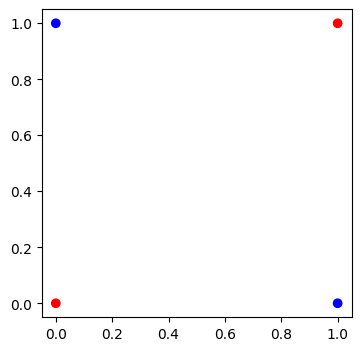

'Red - XOR output of 0.     Blue - XOR output of 1.'

In [ ]:
"""XOR using Neural Networks"""

# defining inputs

x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])

# XOR problem
X = np.array([[0,0], [0,1],[1,0], [1,1]])
y = np.array([0, 1, 1, 0])

plot_graph(x1, x2, y)

"""Red - XOR output of 0. \
    Blue - XOR output of 1."""

Neural Network for XOR



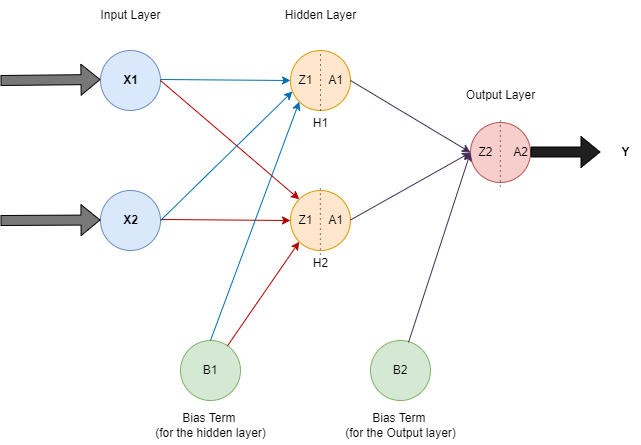

In [ ]:
def init_params():
    """Parameters initialization.

    W1: Weight matrix for connections from the input layer to the next (hidden) layer.
    W2: Weight matrix for connections from the hidden layer to the output layer.
    B = matrix for bias values for

    Returns:
        W1, W2, B1, B2
    """
    W1 = np.random.rand(2, 2)

    # W1 = np.array([[0.45, -0.36], [-0.27, 0.57]]) - 0.5

    W2 = np.random.rand(1, 2)

    # W2 = np.array([[0.09, -0.15]]) - 0.5

    B1 = np.ones((2,4)) - 0.5
    B2 = np.ones((1,4)) - 0.5
    return W1, W2, B1, B2

def Relu(z):
    """Relu Function

    Args:
        z: int

    Returns:
        maximum of 0 and z
    """
    return np.maximum(0, z)

def sigmoid(z):
    """Sigmoid Function

    Args:
        z: int

    Returns:
        value between 0 and 1
    """
    return 1/(1 + np.exp(-z))

def forward_prop(W1, W2, B1, B2, X):
    Z1 = W1.dot(np.transpose(X)) + B1 # activation value obtained from the first hidden layer
    A1 = sigmoid(Z1) # output of the hidden layer
    Z2 = W2.dot(A1) + B2 # activation
    A2 = sigmoid(Z2) # single output Y_pred
    return A1, Z1, A2, Z2

In [ ]:
# One forward Pass

W1, W2, B1, B2 = init_params()

A1, Z1, A2, Z2 = forward_prop(W1, W2, B1, B2, X)

In [ ]:
print(W1)

print("\n\n", W2)

[[0.21754374 0.92991681]
 [0.16442568 0.92807719]]


 [[0.81385922 0.75691068]]


In [ ]:
print("Activation Sum, hidden layer:\n", Z1)

print("\nActivation values:\n", A1)

print("\n\nActivation value for the output layer:\n", Z2)

print("\nActivation Sum - output of the forward pass:\n",A2)

Activation Sum, hidden layer:
 [[0.5        1.42991681 0.71754374 1.64746055]
 [0.5        1.42807719 0.66442568 1.59250288]]

Activation values:
 [[0.62245933 0.80688835 0.6720659  0.83854754]
 [0.62245933 0.80660154 0.66025386 0.83096795]]


Activation value for the output layer:
 [[1.47774038 1.76721885 1.54672023 1.81142817]]

Activation Sum - output of the forward pass:
 [[0.81423104 0.85411147 0.82443953 0.85953439]]
